use open uni_dhl_installed env

In [1]:
import torch
import torch_geometric

C:\Users\NatureChad\anaconda3\envs\open_uni_dhl_installed_pygeom\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import rdkit
from rdkit import Chem

In [3]:
from torch_geometric.datasets import MoleculeNet
data = MoleculeNet(root=".", name="ESOL")
data

ESOL(1128)

In [12]:
torch.cuda.is_available()

False

In [13]:
torch.cuda.device_count()

0

In [17]:
data.num_classes

734

- Chemical graphs however, are invariant to permutations --> Graph Neural Networks
- target dim should be 1 not 734. 1 target value -> Regression Problem.

In [18]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

# edge_index = graph connections
# smiles = molecule with its atoms
# x = node features (32 nodes have each 9 features)
# y = labels (dimension)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Sample  nodes:  32
Sample  edges:  68


In [24]:
data[0].y 

# this is the solubility of each molecule with 32 nodes

# We only have 1 value for this, since this is a graph-level value -> we want to do a graph level prediciton. 

# Thus we must create an embedding for the graph.

tensor([[-0.7700]])

In [38]:
# Investigating the features
# Shape: [num_nodes, num_node_features]
data[0].x

# These are the 32 nodes with 9 features each.

# Each of these lines represent a node Feature Vector of every node.

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [33]:
# Investigating the edges 
# Shape [2, num_edges]
print("Are edges directed : "+str(data[0].is_directed()))
print(data[0].edge_index.t())

# Edges are undirected, and they are counted twice below.

Are edges directed : False
tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
 

In [34]:
data[0]["smiles"] # The smiles string way of writing a molecule

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

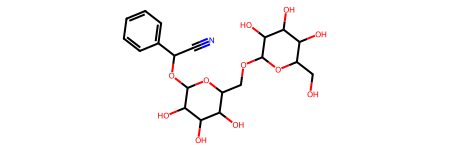

In [35]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

# Visualization of our graph/molecule.

In [36]:
type(molecule)

rdkit.Chem.rdchem.Mol

Building a Graph Neural Network works the same way as building a Convolutional Neural Network, we simple add some layers.

The GCN simply extends torch.nn.Module. GCNConv expects:

    in_channels = Size of each input sample.
    out_channels = Size of each output sample.

We apply three convolutional layers, which means we learn the information about 3 neighbor hops.  NOTE : It is not wise to have too many layers, because having too many leads to oversmoothing 

After that we apply a pooling layer to combine the information of the individual nodes, as we want to perform graph-level prediction.

Always keep in mind that different learning problems (node, edge or graph prediction) require different GNN architectures.

For example for node-level prediction you will often encounter masks. For graph-level predictions on the other hand you need to combine the node embeddings.


Creating a GNN is the same way as creating any NN in pytorch , we are just using GNN layers from torch_geometric.nn.
These are just message passing layers.

In the innit function we define our layers, here 4 message passing layers. The first is a transformation layer, it transforms our 9 node features to an embedding vector of size 64. Then we have our 3 message passing steps, and lastly out Linear output layer which has an output layer of size 1 (not 734, thats a bug ) which means we want to do a regression.

In the forward function we pass in our data : x(node features), edge_index(our edges) and a batch size. We perform the gcn layers giving those and activating them each with with an activation function. The name **hidden** references updated node state. The reason we use **embeding_size*2** is because of the pooling mechanism explained below. We have 2 vectors appended so thats why we have twice the size.

After that we have a global pooling layer. Since we want to do a graph-level prediction (molecule solution),  we have to somehow combine the node embeddings into one representation. We could just sum them up all together, but here we use a global pooling layer. The reason we dont sum them up is because with different graphs we would have different sizes of the embedding vector, which is not optimal.

Here the global pooling is a basic one , where we do mean pooling and max pooling seperately on the note feature vectors, then  concatenate those in 1 embedding for the whole graph.



In [37]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

embedding_size = 64

class GCN(torch.nn.Module): # inherit from this class
    def __init__(self):
        # Init parent
        super(GCN, self).__init__()
        torch.manual_seed(42)

        # GCN layers
        self.initial_conv = GCNConv(data.num_features, embedding_size) 
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
        self.conv3 = GCNConv(embedding_size, embedding_size)

        # Output layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)
          
        # Global Pooling (stack different aggregations)
        hidden = torch.cat([gmp(hidden, batch_index), 
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)

        return out, hidden

model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


We can see from the summary how we have 9 input node features, output into size 64 embedding, then 3 message passing layers, then output 1 embedding.

- We could also reduce the embeddings, but as we have large molecules we use 64
- The more layers we add, the more information we get about the graph
- For the regression problem we use a Linear layer as final output layer
- We try to use not too many parameters, as we only have ~1k samples

So Regarding training : First define a loss function and an optimizer. Then check if GPU available( I can't install CUDA so I just run it with CPU here). Then define a BATCH_SIZE to 64 which is used as we know to speed up calculations etc.

NOTE: Batches are handled a bit differently with graphs. The thing is that you can have different graphs so different number of nodes and edges between them in one batch. So what they do is they concatenate all node features in a large matrix ,and then computing a large adjacency matrix which contains all adjacencies for all 64 graphs. There is no problem here since the graphs are disconnecting by having a 0(no edge) between the different graphs. Then this batch is passed in the GNN layer and get the updated node embeddings for all these 64 individual graphs.

Also we split 80 20 train test.

In [39]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

# Root mean squared error
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)  

# Use GPU for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Wrap data in a data loader
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64
loader = DataLoader(data[:int(data_size * 0.8)], 
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size * 0.8):], 
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
    # Enumerate over the data
    for batch in loader:
      # Use GPU
      batch.to(device)  
      # Reset gradients
      optimizer.zero_grad() 
      # Passing the node features and the connection info and obtaining predictions and embeddings
      pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)  # batch.x node features, batch.edge_index edges, batch.batch is batch index.
      # Calculating the loss and gradients
      loss = loss_fn(pred, batch.y)     
      loss.backward()  
      # Update using the gradients
      optimizer.step()   
    return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
    loss, h = train(data)
    losses.append(loss)
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 11.665949821472168
Epoch 100 | Train Loss 0.8522961735725403
Epoch 200 | Train Loss 1.123275637626648
Epoch 300 | Train Loss 0.32506293058395386
Epoch 400 | Train Loss 0.2441462129354477
Epoch 500 | Train Loss 0.3833293616771698
Epoch 600 | Train Loss 0.23445069789886475
Epoch 700 | Train Loss 0.06752963364124298
Epoch 800 | Train Loss 0.17226971685886383
Epoch 900 | Train Loss 0.19097530841827393
Epoch 1000 | Train Loss 0.06340726464986801
Epoch 1100 | Train Loss 0.04240541160106659
Epoch 1200 | Train Loss 0.10679217427968979
Epoch 1300 | Train Loss 0.06002793833613396
Epoch 1400 | Train Loss 0.06042511761188507
Epoch 1500 | Train Loss 0.014942551963031292
Epoch 1600 | Train Loss 0.06070227548480034
Epoch 1700 | Train Loss 0.009904931299388409
Epoch 1800 | Train Loss 0.05097135528922081
Epoch 1900 | Train Loss 0.06837863475084305


In [41]:
torch.cuda.is_available()

False

<AxesSubplot:>

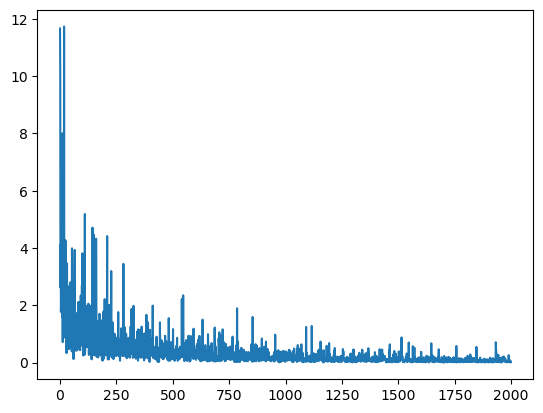

In [45]:
# Visualize learning (training loss)
import seaborn as sns
losses_float = [float(loss.cpu().detach().numpy()) for loss in losses] 
loss_indices = [i for i,l in enumerate(losses_float)] 
plt = sns.lineplot(x=loss_indices, y=losses_float)
plt

In [46]:
import pandas as pd 

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,0.940,0.437253
1,-6.237,-2.889908
2,-2.540,-3.109433
3,-5.680,-5.867784
4,-2.460,-1.960660
...,...,...
59,-1.890,-1.605698
60,-2.218,-4.570598
61,-3.583,-1.081239
62,-2.580,-2.442059


y as we stated before the the soludity (or whatever) value of each molecule. We see that our regression is pretty good, althought it has some variance.

<AxesSubplot:xlabel='y_real', ylabel='y_pred'>

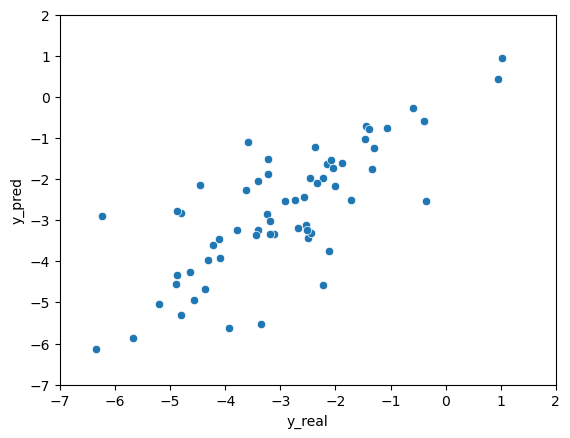

In [47]:
plt = sns.scatterplot(data=df, x="y_real", y="y_pred")
plt.set(xlim=(-7, 2))
plt.set(ylim=(-7, 2))
plt

Improving the model / More to play around with

For example you can add:

    Dropouts
    Other (more intelligent) Pooling Layers (all layers here: https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#)
    Global Pooling Layers
    Batch Normalization
    More MP layers
    Other hidden state sizes
    Test metrics (test error) and Hyperparameter optimization
    ...

https://github.com/rusty1s/pytorch_geometric/tree/master/examples


- GCN paper : https://arxiv.org/pdf/1609.02907.pdf
- How GCN layer works : https://pytorch-geometric.readthedocs.io/en/latest/notes/create_gnn.html
- https://github.com/pyg-team/pytorch_geometric
- also look at this PAPER : Simple Graph Convolution (SGC) which is GCN simplified (smarter)

next after this : 
- https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8#scrollTo=qoW2Z7P70LNQ
- https://colab.research.google.com/drive/14OvFnAXggxB8vM4e8vSURUp1TaKnovzX?usp=sharing#scrollTo=paMH3_7ejSg4
- https://colab.research.google.com/drive/1LJir3T6M6Omc2Vn2GV2cDW_GV2YfI53_?usp=sharing#scrollTo=-3dnSaQnR6Ci
- https://colab.research.google.com/drive/1I8a0DfQ3fI7Njc62__mVXUlcAleUclnb#scrollTo=1tBMhOrq4JKw
- https://colab.research.google.com/drive/1XAjcjRHrSR_ypCk_feIWFbcBKyT4Lirs
- https://www.youtube.com/watch?v=QLIkOtKS4os&list=PLV8yxwGOxvvoNkzPfCx2i8an--Tkt7O8Z&index=10 ( big project)
- Traffic forecasting (pytorch geom temporal) , fraud detection , reccomender systems etc.. 
- GNN courses i had found 
- look at notes in my note's book or the big notebook for more links etc. or booksmarks on both laptops.
- mention the other libraries 
- start trying to see how and if TGN for logistics can be performed 

In [ ]:
https://www.youtube.com/watch?v=2KRAOZIULzw&t=12s